In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [2]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
# Global aggregation
global_daily = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()


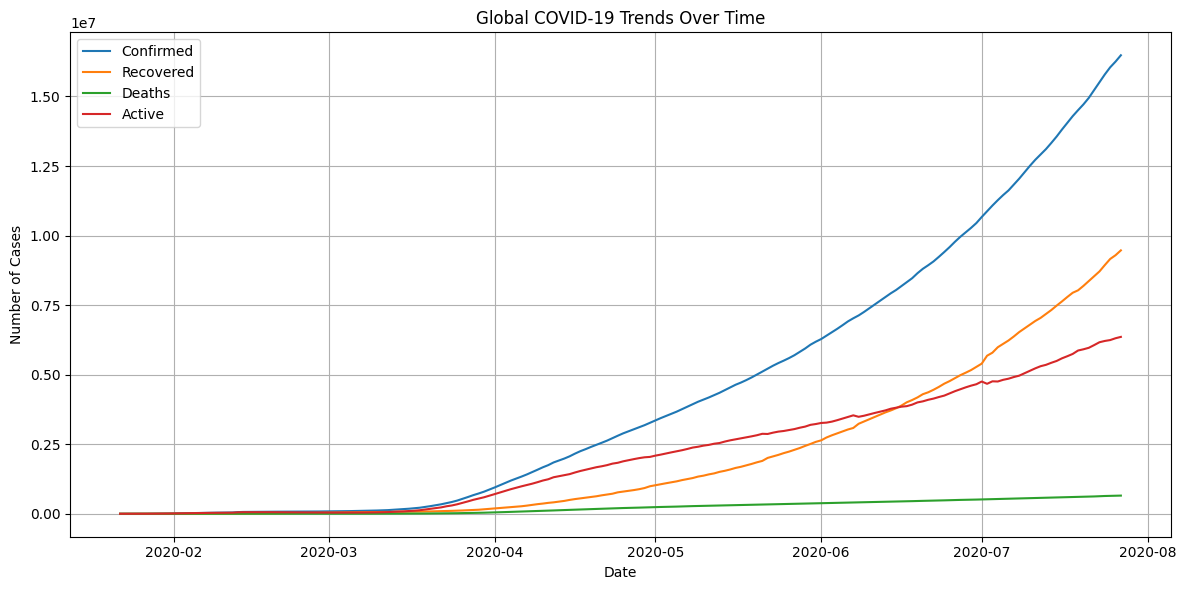

In [9]:
# Visualize COVID-19 Trends
plt.figure(figsize=(12, 6))
plt.plot(global_daily['Date'], global_daily['Confirmed'], label='Confirmed')
plt.plot(global_daily['Date'], global_daily['Recovered'], label='Recovered')
plt.plot(global_daily['Date'], global_daily['Deaths'], label='Deaths')
plt.plot(global_daily['Date'], global_daily['Active'], label='Active')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Forecast with Prophet
df_prophet = global_daily[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1vgpntz/2vix1uo6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1vgpntz/rxntmic6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44855', 'data', 'file=/tmp/tmps1vgpntz/2vix1uo6.json', 'init=/tmp/tmps1vgpntz/rxntmic6.json', 'output', 'file=/tmp/tmps1vgpntz/prophet_modeldlyh1_w8/prophet_model-20250727060159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:01:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:01:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


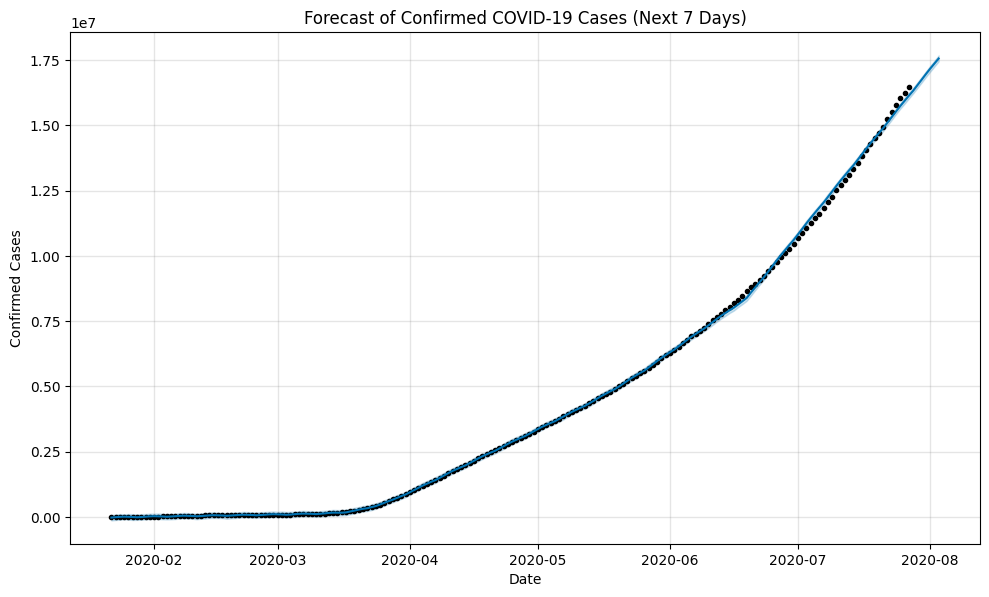

In [7]:
# Plot the forecast
model.plot(forecast)
plt.title('Forecast of Confirmed COVID-19 Cases (Next 7 Days)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()